In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data kuesioner dari Excel
df = pd.read_excel("data_kuesioner.xlsx")

# Anggap kolom pertanyaan mulai dari kolom ke-2
question_cols = df.columns[1:]

# Mapping skala Likert ke angka
likert_map = {
    "STS": 1,  # Sangat Tidak Setuju
    "TS": 2,   # Tidak Setuju
    "N": 3,    # Netral
    "S": 4,    # Setuju
    "SS": 5    # Sangat Setuju
}

df_num = df.copy()
for col in question_cols:
    df_num[col] = df_num[col].map(likert_map)



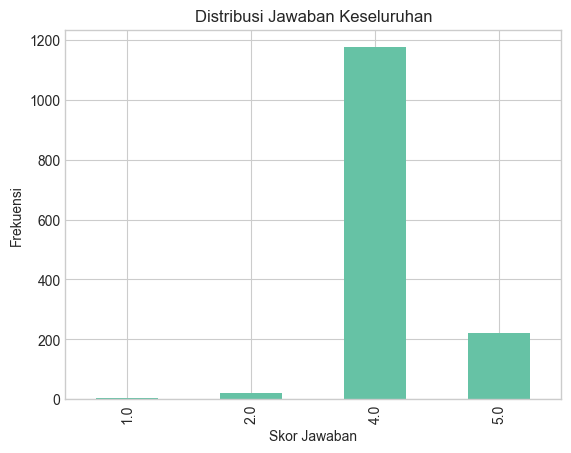

In [16]:
# 1. Bar Chart distribusi seluruh jawaban
all_answers = df_num[question_cols].values.flatten()
dist_all = pd.Series(all_answers).value_counts().sort_index()

plt.figure()
dist_all.plot(kind='bar')
plt.title("Distribusi Jawaban Keseluruhan")
plt.xlabel("Skor Jawaban")
plt.ylabel("Frekuensi")
plt.show()

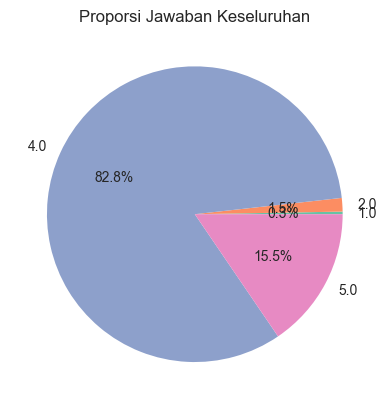

In [12]:
# 2. Pie Chart proporsi seluruh jawaban
plt.figure()
dist_all.plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporsi Jawaban Keseluruhan")
plt.ylabel("")
plt.show()




<Figure size 640x480 with 0 Axes>

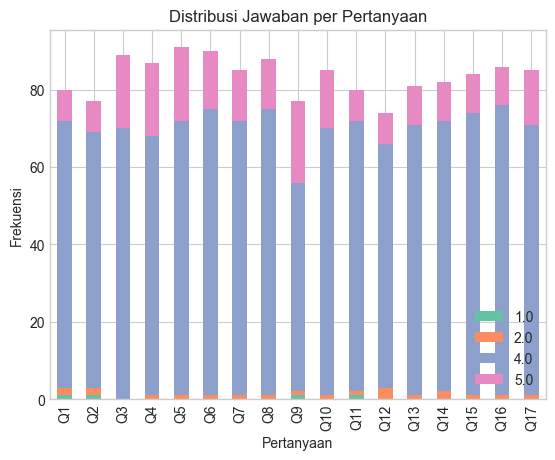

In [13]:
# 3. Stacked Bar distribusi jawaban per pertanyaan
dist_per_question = df_num[question_cols].apply(lambda x: x.value_counts()).fillna(0).sort_index()

plt.figure()
dist_per_question.T.plot(kind='bar', stacked=True)
plt.title("Distribusi Jawaban per Pertanyaan")
plt.xlabel("Pertanyaan")
plt.ylabel("Frekuensi")
plt.show()



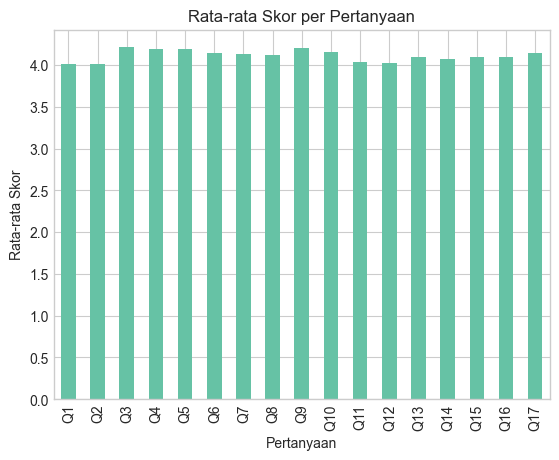

In [14]:
# 4. Bar Chart rata-rata skor per pertanyaan
avg_scores = df_num[question_cols].mean()

plt.figure()
avg_scores.plot(kind='bar')
plt.title("Rata-rata Skor per Pertanyaan")
plt.xlabel("Pertanyaan")
plt.ylabel("Rata-rata Skor")
plt.show()



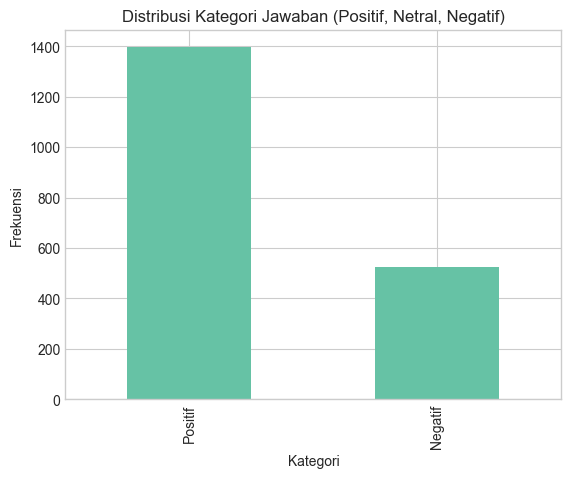

In [15]:
# 5. Bar Chart kategori Positif, Netral, Negatif
def categorize(x):
    if x >= 4:
        return "Positif"
    elif x == 3:
        return "Netral"
    else:
        return "Negatif"

categories = df_num[question_cols].applymap(categorize).values.flatten()
cat_dist = pd.Series(categories).value_counts()

plt.figure()
cat_dist.plot(kind='bar')
plt.title("Distribusi Kategori Jawaban (Positif, Netral, Negatif)")
plt.xlabel("Kategori")
plt.ylabel("Frekuensi")
plt.show()